In [2]:
# Paquete Numpy
import numpy as np

# Generación de números pseudoaleatorios
from numpy import random as rd

# Módulo para las gráficas
from matplotlib import pyplot as plt

# Análisis de datos
import pandas as pd
from pandas import DataFrame as df

<h1 style="background-color:Green;font-size:36pt;color:white">MODELOS DE SIMULACIÓN </h1>

## Universidad Tecnológica La Salle - León, Nicaragua
### Giusseppe Benito Bervis Quintero

# Generador de números pseudoaleatorios (GNPA)

La generación de sucesiones aleatorias reales utilizando algoritmos deterministas es imposible; a lo más, sucesiones **pseudoaleatorias** pueden ser generadas. Estas son, en apariencia, sucesiones aleatorias que en realidad son perfectamente predecibles y que se repiten después de cierta cantidad de ejecuciones. Un generador de números pseudoaleatorios es un algoritmo diseñado para producir una sucesión de números que aparentan ser generados aleatoriamente.


# Explorando métodos genéricos para generar distribuciones aleatorias

La mayoría de lenguajes de programación proveen a los usuarios funciones para generar números pseudoaleatorios con una distribución uniforme en el rango $[0,1]$. Estos generadores son, casi siempre, considerados continuos. Sin embargo, en realidad, son discretos incluso si tienen un paso de discretización muy pequeño. Cualquier secuencia de números pseudoaleatorios puede ser generada a partir de una distribución uniforme de números aleatorios. 

## Método de la transformada inversa
Teniendo un GNPA con distribución uniforme continua en el rango $[0,1]$, es posible generar secuencias continuas con cualquier distribución de probabilidad usando el método de la transformada inversa. Consideramos una variables aleatoria continua, $x$, teniendo una densidad de probabilidad $f(x)$. La correspondiente función de distribución, $F(x)$, es determinado por esta función:
$$F(x) = \int f(x)*dx$$
La función de distribución, $F(x)$, de una variable aleatoria indica la probabilidad de que la variable tome un valor menor o igual que $x$. La expresión analítica (si la hay) de la función inversa se define como $x = F^{-1}(x)$. **La determinación de la muestra de la variable $x$ se obtiene generando un valor entre 0 y 1 y reemplazándolo en la expresión de la función de distribución inversa.**

Es decir, puesto que $F(x)$ está definida en el intervalo $[0,1]$, se puede generar un número aleatorio uniforme $R \in [0,1]$ y tratar de determinar el valor de la variable aleatoria para la cual su distribución acumulada es igual a $R$:
$$F(x) = R \text{ o } x = F^{-1}(R)$$

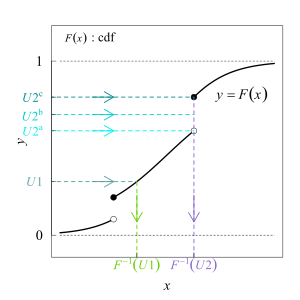

La dificultad principal de este método descansa en el hecho de que algunas ocasiones es difícil encontrar la transformada inversa. Sin embargo, si esta función inversa ya ha sido encontrada, generando números aleatorios uniformes se podrán obtener valores de la variable aleatoria que sigan la distribución de probabilidad deseada.

Este método se puede utilizar para obtener muestras de muchos tipos de funciones de distribución, como exponencial, uniforme o triangular. Resulta ser el método más intuitivo, pero no el más computacionalmente efectivo. 

## Ejercicio:
Se desea generar números aleatorios que sigan la siguiente distribución de probabilidad:
$$f(x) = \begin{cases} 3x^2 & \text{si } 0 \leq x \leq 1 \\0  & e.o.c \end{cases}$$

**Solución:** La distribución acumulada es
$$F(x) = 3 \int{x^2 dx} = x^3$$
De lo que se tiene que su inversa es:
$$F^{-1}(x) = x^{1/3}$$
para valores de $0 \leq x \leq 1$.

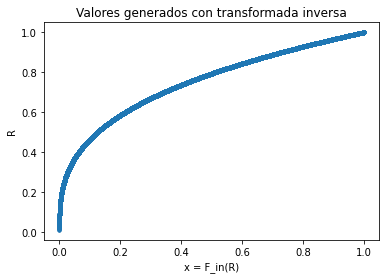

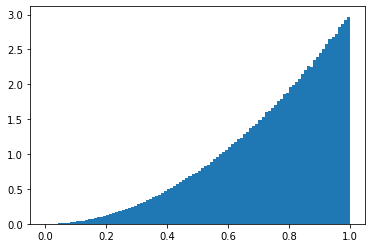

In [41]:
# Definiendo la función inversa
F_inv = lambda x: x**(1/3)

# Números aleatorios en el intervalo [0,1]
R = np.random.random(1000000)

# Valuando los números aleatorios en la 
# función inversa
x = F_inv(R)

# Graficando 
plt.plot(R, x, '.')

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Valores generados con transformada inversa')
plt.show()

# Observando el histograma de la distribución 
# de los datos generados con el método
plt.hist(x= x, bins=100, range = (0,1), density=True)

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Histograma - Valores generados con transformada inversa')
plt.show()

**Ejercicio** Se desea generar número al azar que sigan las siguiente distribución de probabilidad:
$$f(x) = \begin{cases} 2x, & \mbox{si } 0 \leq x \leq 1 \\ 0, & \mbox{en otro caso} \end{cases}$$

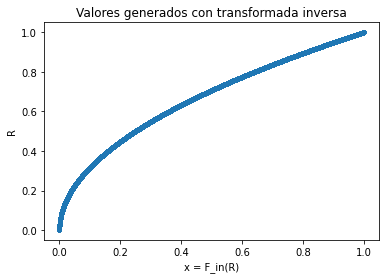

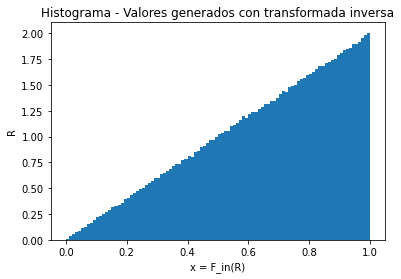

In [3]:
# Definiendo la función inversa
F_inv = lambda x: x**(1/2)

# Números aleatorios en el intervalo [0,1]
R = np.random.random(1000000)

# Valuando los números aleatorios en la 
# función inversa
x = F_inv(R)

# Graficando 
plt.plot(R, x, '.')

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Valores generados con transformada inversa')
plt.show()

# Observando el histograma de la distribución 
# de los datos generados con el método
plt.hist(x= x, bins=100, range = (0,1), density=True)

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Histograma - Valores generados con transformada inversa')
plt.show()

Dada la siguiente función, use el método de la transformada inversa para generar números pseudoaleatorios que sigan esa distribución de probabilidad.
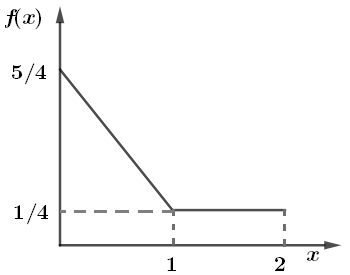

**Solución**
La función de la imagen es
$$f(x) = \begin{cases} -x + \frac{5}{4} & \mbox{si } 0 \leq x \leq 1 \\ \frac{1}{4} & \mbox{si } 1 < x \leq 2\\ 0 & \mbox{en otro caso}\end{cases}$$

Primero hay que encontrar la función integral:
$$F(x) = \begin{cases} \frac{-x^2}{2} + \frac{5x}{4} & \mbox{si } 0 \leq x \leq 1 \\ \frac{x}{4} +0.5 & \mbox{si } 1 < x \leq 2\\ 0 & \mbox{en otro caso}\end{cases}$$


Cuya función inversa es:
$$f^{-1}(x) = \begin{cases} 0 & \mbox{si } x < 0 \\ \frac{5-\sqrt{25-32x}}{4} & \mbox{si } 0 \leq x \leq 0.75 \\ 4x -2  & \mbox{si } 0.75 < x \leq 1\\ 1 & \mbox{si } 1 < x\end{cases}$$

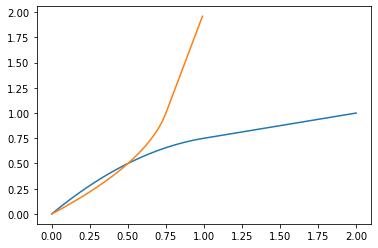

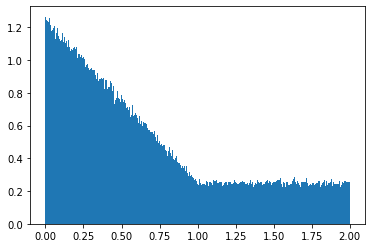

In [125]:
def f(x):
    if 0 <= x and x <= 1:
        return -x**2/2 + 5/4*x
    elif 1 < x and x <= 2:
        return 1/4*x + 0.5
    else:
        return 0

def fi(x):
    if 0 <= x and x <= 0.75:
        return (5 - np.sqrt(25 - 32*x))/4
    elif 0.75 < x and x <= 1:
        return 4*x - 2

# Inputs :
# f es la función
# f_i es la función inversa
# a y b son los extremos del intervalo a generar, inferior y superior respectivamente
# n es el número de valores a generar
def Inverse_Transform(f, f_i, a, b, n):
    
    # El valor de c lo vamos a determinar con el máximo de la función
    c = 0
    puntos = np.linspace(a,b,100)
    for i in range(len(puntos)):
        valor = f(puntos[i])
        if valor > c:
            c = valor
    
    # Números aleatorios uniformes en el intervalo [0,1]
    U1 = rd.uniform(0, 1, n)

    # Valuando los números aleatorios uniformes en la función inversa
    Val_gen = []
    for i in U1:
        Val_gen.append(f_i(i))
    
    return Val_gen
    

    
x = np.linspace(0,2,100)
y1 = []
y2 = []
for i in range(len(x)):
    y1.append(f(x[i]))
    y2.append(fi(x[i]))

plt.plot(x,y1)
plt.plot(x, y2)
plt.show()

a = 0
b = 1

pts = Inverse_Transform(f, fi, a, b, 1000000)
plt.hist(pts, density = True, bins = 1000)
plt.show()

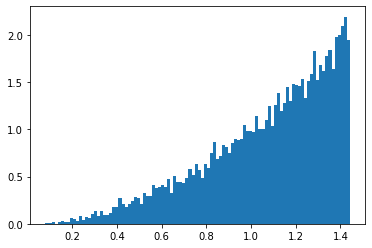

In [77]:
# Inputs :
# f es la función
# f_i es la función inversa
# a y b son los extremos del intervalo a generar, inferior y superior respectivamente
# n es el número de valores a generar
def Inverse_Transform(f, f_i, a, b, n):
    
    # El valor de c lo vamos a determinar con el máximo de la función
    c = 0
    puntos = np.linspace(a,b,100)
    for i in range(len(puntos)):
        valor = f(puntos[i])
        if valor > c:
            c = valor
    
    # Números aleatorios uniformes en el intervalo [0,c]
    U1 = rd.uniform(0, c, n)

    # Valuando los números aleatorios uniformes en la función inversa
    Val_gen = f_i(U1)
    
    return Val_gen


f = lambda x: 3*x**2
fi = lambda x: x**(1/3)
a = 0
b = 1

pts = Inverse_Transform(f, fi, a, b, 10000)
plt.hist(pts, density = True, bins = 100)
plt.show()

## Ejercicio 2. 
Dada la siguiente función, use el método de aceptación y rechazo para generar números pseudoaleatorios que sigan esa distribución de probabilidad.
$$f(x) = \begin{cases} - \frac{8}{5} x + \frac{9}{10}, & \mbox{si } 0 \leq x \leq 0.5 \\
                         \frac{8}{5} x - \frac{7}{10}, & \mbox{si } 0.5 < x \leq 1 \\
                       - \frac{8}{5} x + \frac{5}{2}, & \mbox{si } 1 < x \leq 1.5 \\
                         \frac{8}{5} x - \frac{23}{10}, & \mbox{si } 1.5 < x \leq 2 \\
                                                   0,  & \mbox{en otro caso} \end{cases}$$